# Principal Component Analysis
### Used to reduce dimensionality / address multicollinearity / consolidate variables

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#Load the dataset and split into X and y
df = pd.read_csv('../data/iris.csv')
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [90]:
#Scaling is necessary for PCA. Calculates Z score for each value 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [66]:
#PCA to reduce dimensionality from 4 to 3
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
df2 = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2', 'Prinicipal Component 3'])
df2

,Principal Component 1,Principal Component 2,Prinicipal Component 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
...,...,...,...
145,1.870522,0.382822,0.254532
146,1.558492,-0.905314,-0.025382
147,1.520845,0.266795,0.179277
148,1.376391,1.016362,0.931405


In [80]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [78]:
#How much variance is explained by each component?
pca.explained_variance_ratio_

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [84]:
#PCA to reduce dimensionality from 4 to 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df2 = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
df2

,Principal Component 1,Principal Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [80]:
#How important are each of the original factors in determining the components (rows are PCs, columns are original factors)
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [74]:
#How much variance is explained by each component?
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [76]:
#Combining principal components and y
df3 = pd.concat([df2, y], axis = 1)
df3

,Principal Component 1,Principal Component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


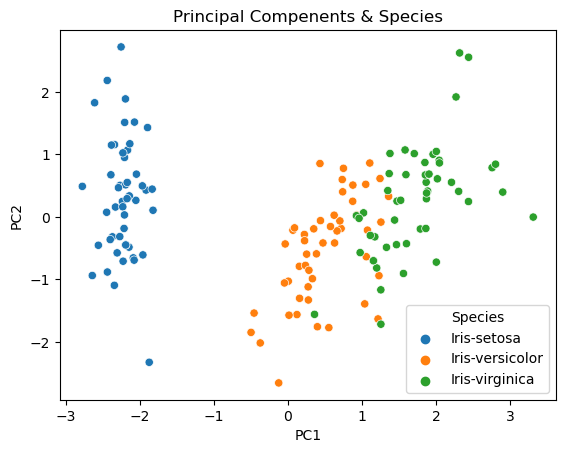

In [60]:
#Graphing 
sns.scatterplot(data=df3, x='Principal Component 1', y='Principal Component 2', hue='Species')
plt.title('Principal Compenents & Species')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Species')
plt.show()

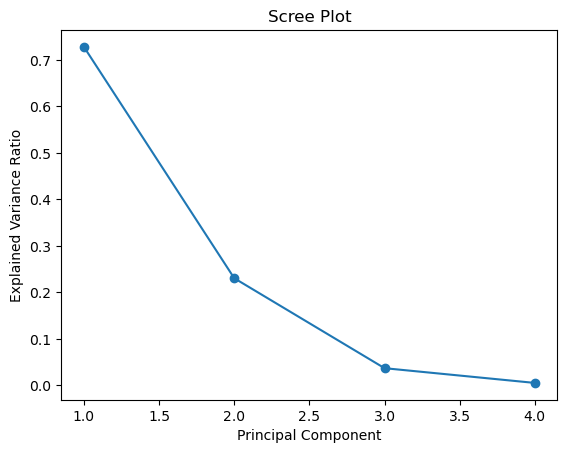

In [110]:
#Scree Plot: How much variance is explained by each principal component
pca_full = PCA().fit(X)  
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

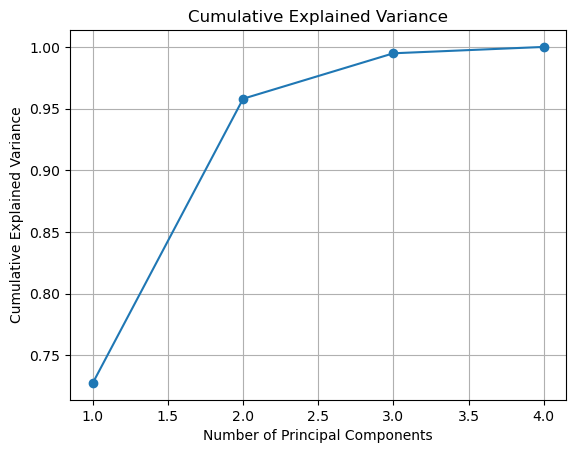

In [112]:
#Cumulative Variance Explained Plot: What percent of variance is accounted for by the number of principal components included
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

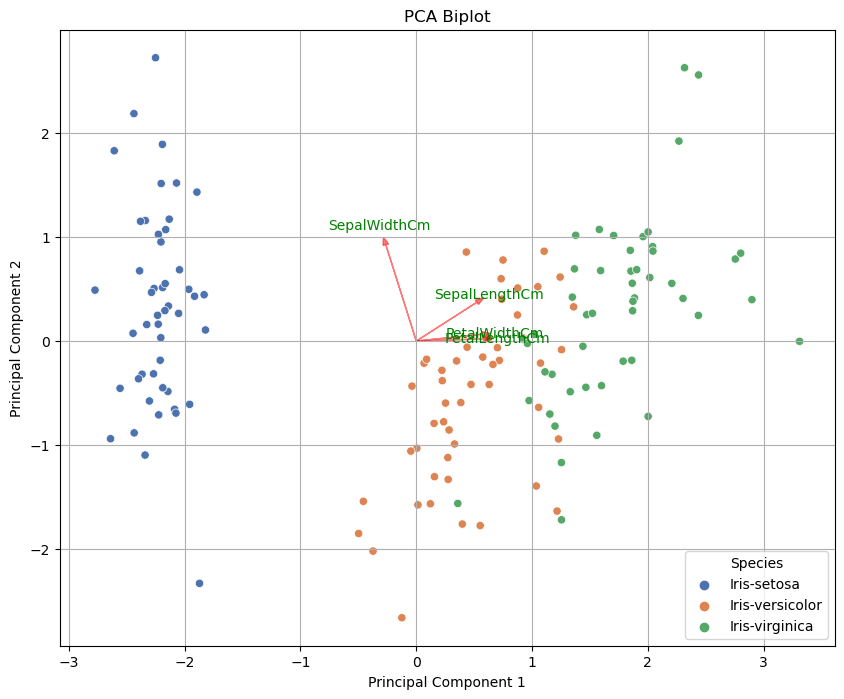

In [128]:
#Biplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Species', palette='deep')

for i, (component_1, component_2) in enumerate(pca.components_.T):
    plt.arrow(0, 0, component_1, component_2, color='r', alpha=0.5, head_width=0.05)
    plt.text(component_1 * 1.2, component_2 * 1.2, X.columns[i], color='g', ha='center', va='center')

plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()